In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [3]:
#Loading the dataset
df1 = pd.read_csv('Bengaluru_House_Data.csv')

In [4]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
df1.shape

(13320, 9)

#### Droping features theat are not required

In [7]:
df2 = df1.drop(['area_type','society','balcony','availability'],axis=1)


In [8]:
#Removing the Duplicates
df2.shape

(13320, 5)

## Data Cleaning: Handling NA values

In [9]:
df2.isnull().sum()


location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [10]:
df3 = df2.dropna()

In [11]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [12]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [13]:
import string as str

In [14]:
df3['size'] = df3['size'].str.replace('Bedroom','BHK')

d:\PROJECTS\End_To_End_project\BengaluruHousePricePridiction\venv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
df3['size'] = df3['size'].str.replace('RK','BHK')


d:\PROJECTS\End_To_End_project\BengaluruHousePricePridiction\venv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
df3['size'].unique()

array(['2 BHK', '4 BHK', '3 BHK', '6 BHK', '1 BHK', '8 BHK', '7 BHK',
       '5 BHK', '11 BHK', '9 BHK', '27 BHK', '10 BHK', '19 BHK', '16 BHK',
       '43 BHK', '14 BHK', '12 BHK', '13 BHK', '18 BHK'], dtype=object)

In [17]:
df3['rooms'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

d:\PROJECTS\End_To_End_project\BengaluruHousePricePridiction\venv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [18]:
df3.head()

,location,size,total_sqft,bath,price,rooms
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 BHK,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [19]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True


In [20]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,rooms
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 BHK,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 BHK,3090 - 5002,4.0,445.000,4


#### Above shows that total_sqft can be a range (e.g. 2100-2850). For such case we can just take average of min and max value in the range. There are other cases such as 34.46Sq. Meter which one can convert to square ft using unit conversion. I am going to just drop such corner cases to keep things simple

In [21]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None   
        return np.nan

In [22]:
df4 = df3.copy()
df4.total_sqft = df4.total_sqft.apply(convert_sqft_to_num)
df4 = df4[df4.total_sqft.notnull()]
df4.head(2)

,location,size,total_sqft,bath,price,rooms
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 BHK,2600.0,5.0,120.00,4


#### Examine locations which is a categorical variable. We need to apply dimensionality reduction technique here to reduce number of locations

In [23]:
df4.location = df4.location.apply(lambda x: x.strip())
location_stats = df4['location'].value_counts(ascending=False)
location_stats

Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: location, Length: 1287, dtype: int64

#### Dimensionality Reduction
##### Any location having less than 10 data points should be tagged as "other" location. This way number of categories can be reduced by huge amount. Later on when we do one hot encoding, it will help us with having fewer dummy columns

In [24]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

BTM 1st Stage                10
Gunjur Palya                 10
Nagappa Reddy Layout         10
Sector 1 HSR Layout          10
Thyagaraja Nagar             10
                             ..
Rajanna Layout                1
Subramanyanagar               1
Lakshmipura Vidyaanyapura     1
Malur Hosur Road              1
Abshot Layout                 1
Name: location, Length: 1047, dtype: int64

In [25]:
len(df4['location'].unique())

1287

In [26]:
df4.location = df4.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
df4.location.nunique()

241

### Outlier Removal
2 bhk apartment is minimum 600 sqft. If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft



In [27]:
df4[df4.total_sqft/df4.rooms<300].head()

,location,size,total_sqft,bath,price,rooms
9,other,6 BHK,1020.0,6.0,370.0,6
45,HSR Layout,8 BHK,600.0,9.0,200.0,8
58,Murugeshpalya,6 BHK,1407.0,4.0,150.0,6
68,Devarachikkanahalli,8 BHK,1350.0,7.0,85.0,8
70,other,3 BHK,500.0,3.0,100.0,3


In [28]:
df5 = df4[~(df4.total_sqft/df4.rooms<300)]
df5.shape

(12456, 6)

# EDA


In [29]:

import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [30]:
df5[['total_sqft','rooms','bath','price']].corr()

,total_sqft,rooms,bath,price
total_sqft,1.000000,0.517456,0.533818,0.582676
rooms,0.517456,1.000000,0.869481,0.479312
bath,0.533818,0.869481,1.000000,0.529346
price,0.582676,0.479312,0.529346,1.000000


In [31]:
numeric_features = df5.select_dtypes(include=[np.number])  # Selects only numerical columns


In [32]:
vif_data = pd.DataFrame()
vif_data["Feature"] = numeric_features.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_features.values, i) for i in range(len(numeric_features.columns))]

print(vif_data)


      Feature        VIF
0  total_sqft   4.450438
1        bath  29.281257
2       price   2.452795
3       rooms  27.946234


In [33]:
df5[['rooms', 'bath']].corr()

,rooms,bath
rooms,1.000000,0.869481
bath,0.869481,1.000000


In [34]:
df6 = df5.drop(columns=['rooms'])

In [35]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12456 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    12456 non-null  object 
 1   size        12456 non-null  object 
 2   total_sqft  12456 non-null  float64
 3   bath        12456 non-null  float64
 4   price       12456 non-null  float64
dtypes: float64(3), object(2)
memory usage: 583.9+ KB


In [36]:
df6['size'].unique()

array(['2 BHK', '4 BHK', '3 BHK', '1 BHK', '8 BHK', '6 BHK', '5 BHK',
       '7 BHK', '11 BHK', '9 BHK', '10 BHK', '16 BHK', '13 BHK'],
      dtype=object)

In [37]:
import seaborn as sns

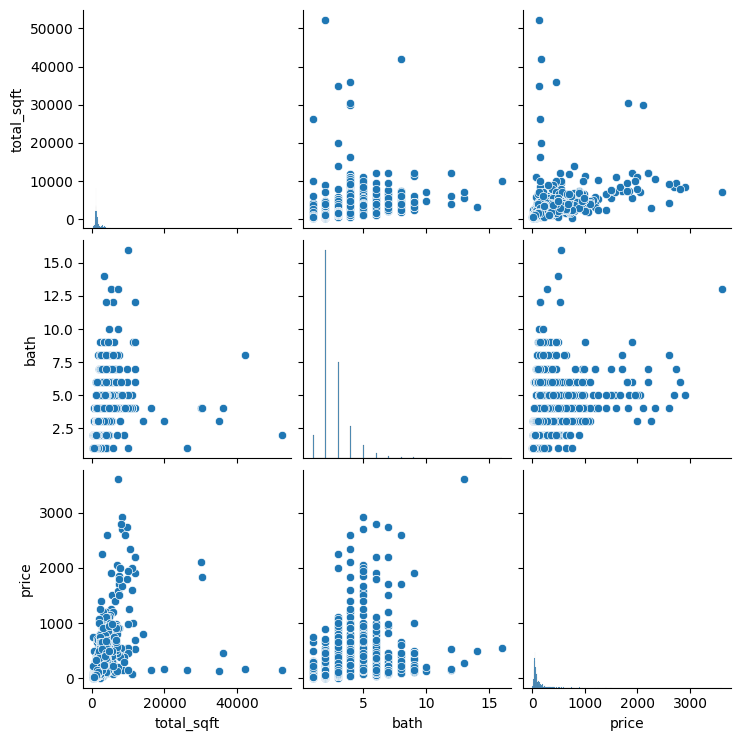

In [38]:
sns.pairplot(df6)

<AxesSubplot:xlabel='price', ylabel='bath'>

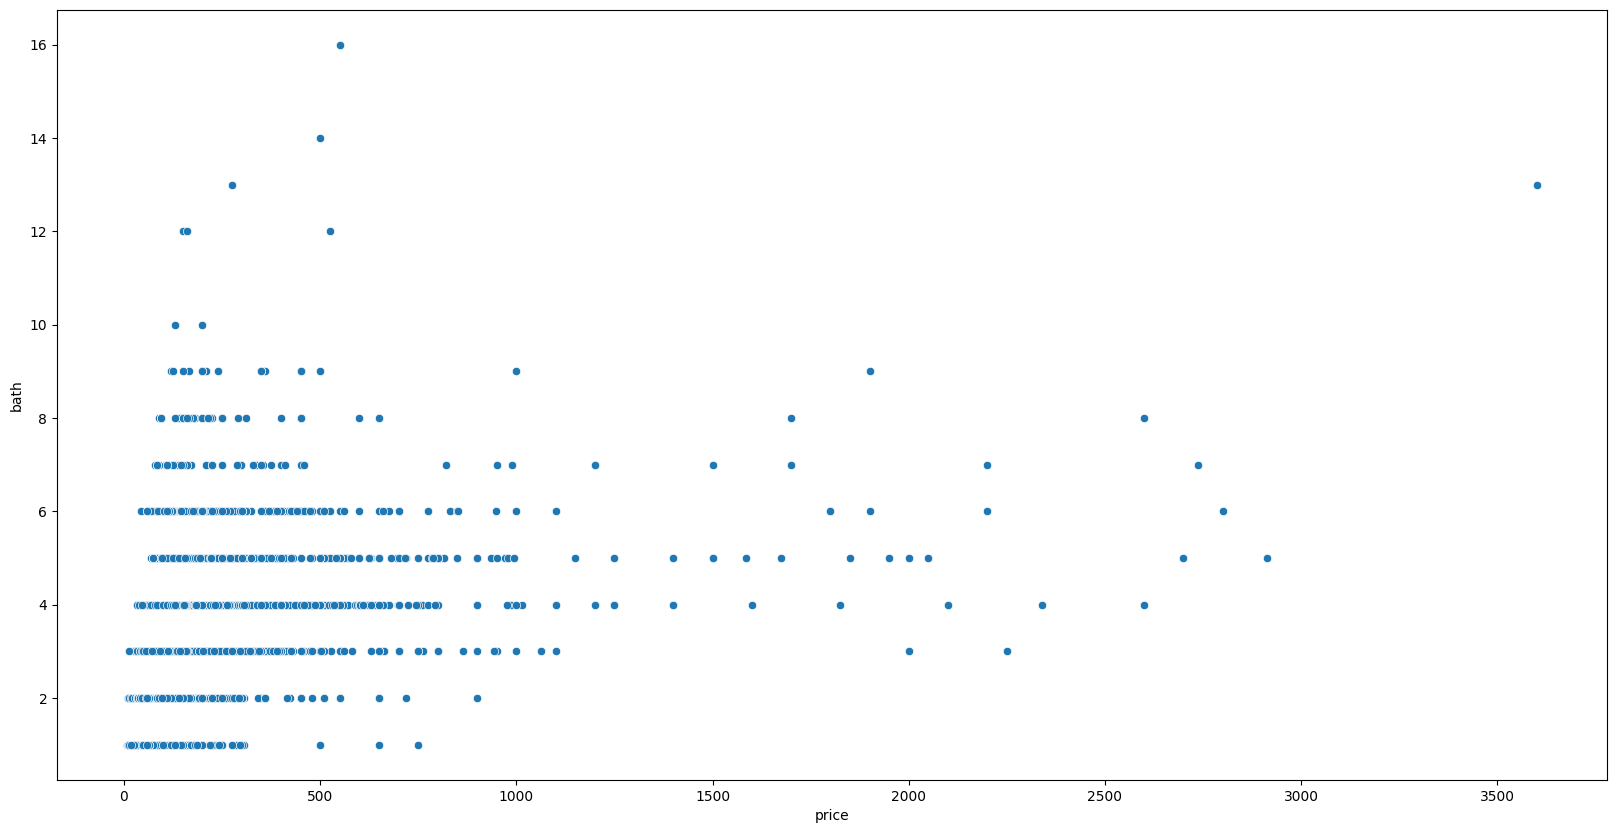

In [39]:
sns.scatterplot(x='price',y='bath',data=df6)

<AxesSubplot:xlabel='price', ylabel='Count'>

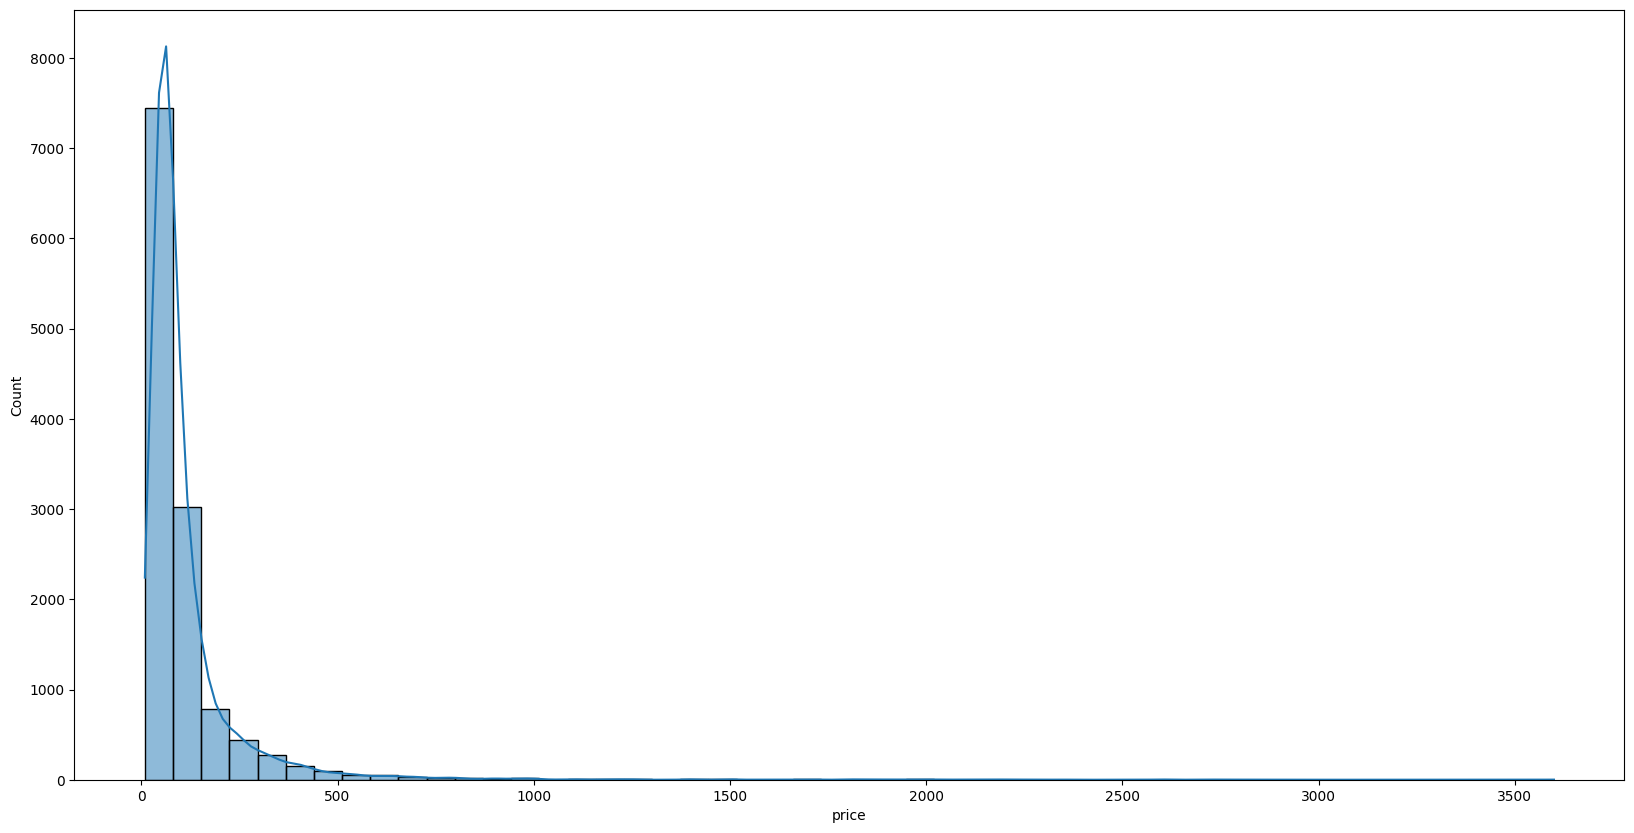

In [40]:
sns.histplot(df6['price'],bins=50,kde=True)


<AxesSubplot:xlabel='total_sqft', ylabel='Count'>

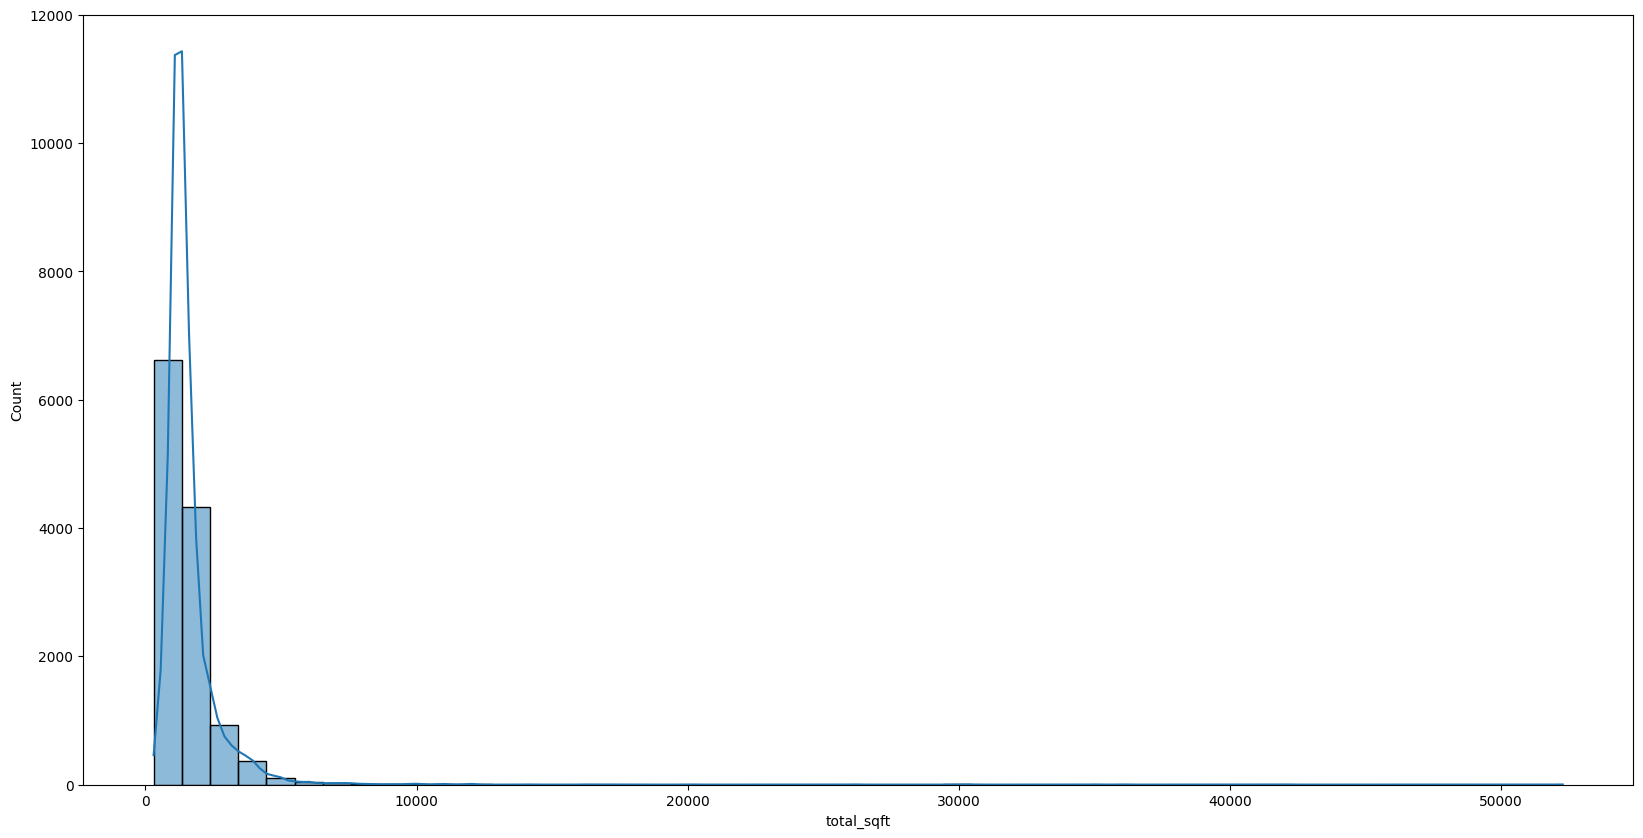

In [41]:
sns.histplot(df6['total_sqft'],kde=True,bins=50)


In [42]:
df6[['price','total_sqft']]

,price,total_sqft
0,39.07,1056.0
1,120.00,2600.0
2,62.00,1440.0
3,95.00,1521.0
4,51.00,1200.0
...,...,...
13315,231.00,3453.0
13316,400.00,3600.0
13317,60.00,1141.0
13318,488.00,4689.0


<AxesSubplot:>

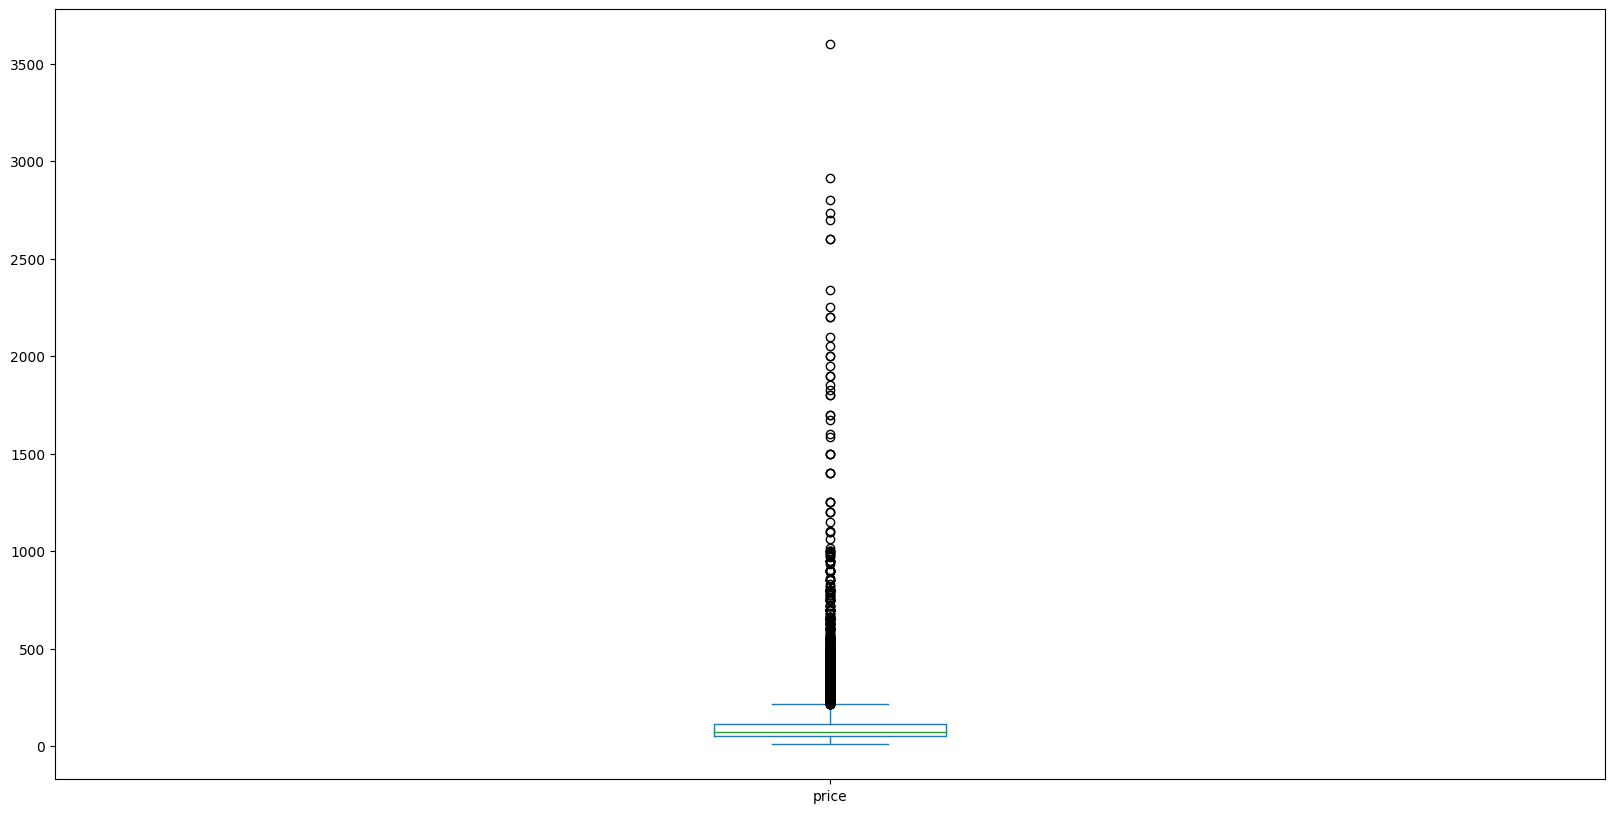

In [43]:
df6['price'].plot(kind='box')


<AxesSubplot:xlabel='price', ylabel='total_sqft'>

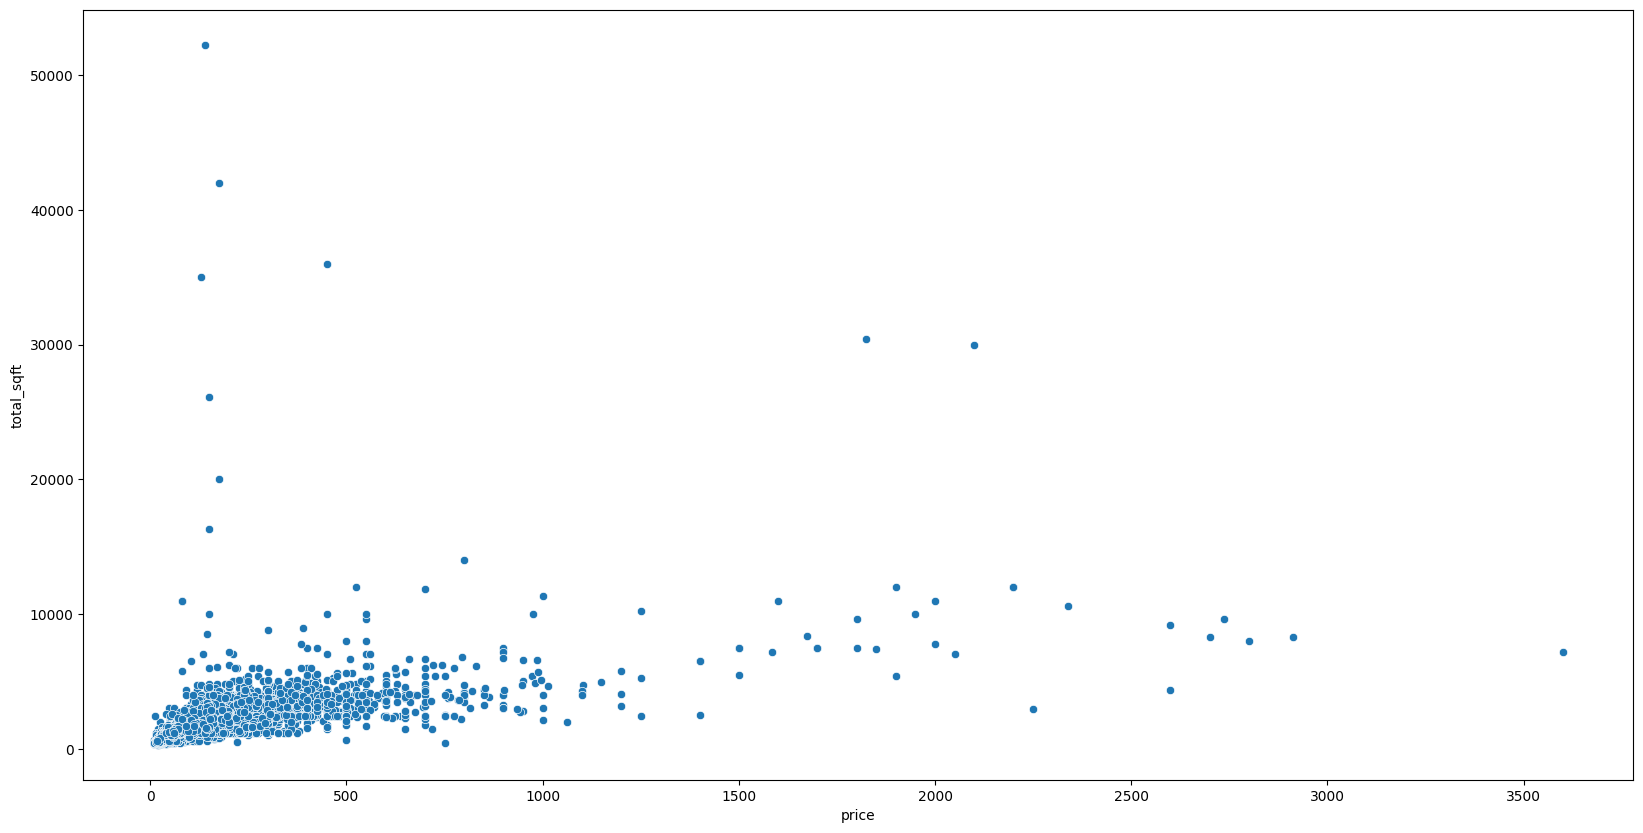

In [44]:
sns.scatterplot(x=df6['price'],y=df6['total_sqft'])

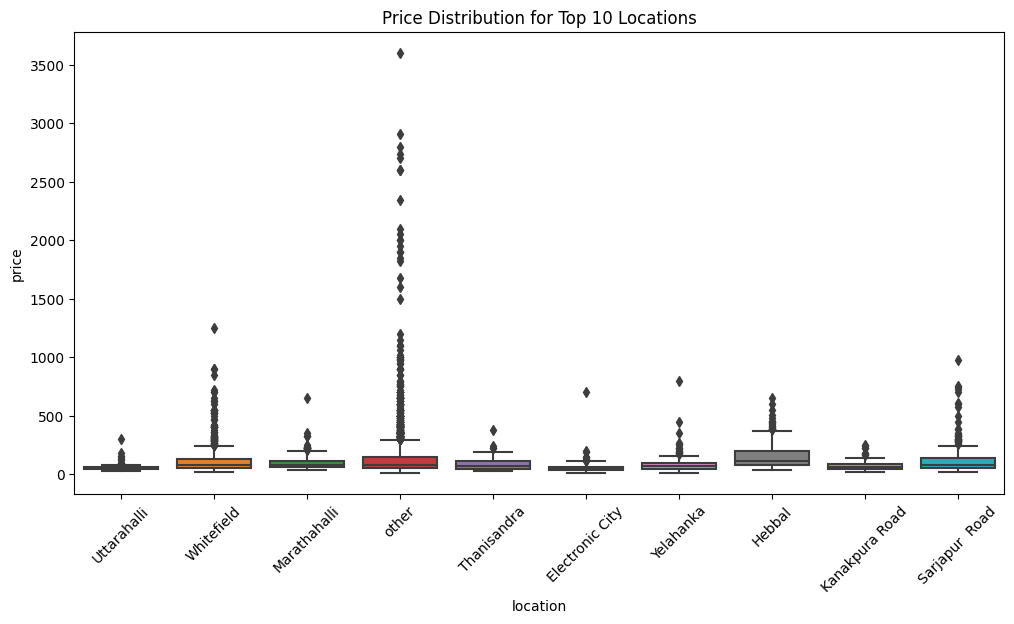

In [45]:
top_locations = df6['location'].value_counts().head(10).index
df_top = df6[df6['location'].isin(top_locations)]

plt.figure(figsize=(12, 6))
sns.boxplot(x=df_top['location'], y=df_top['price'])
plt.xticks(rotation=45)
plt.title("Price Distribution for Top 10 Locations")
plt.show()

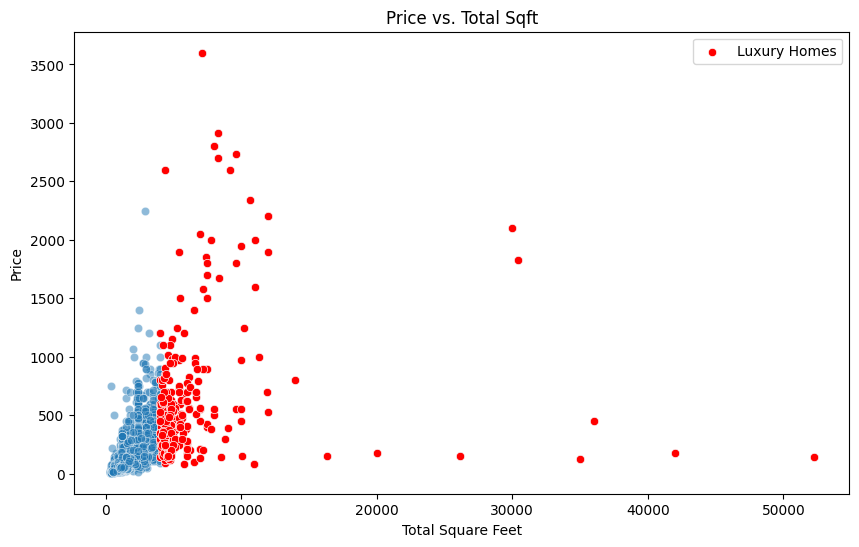

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df6, x="total_sqft", y="price", alpha=0.5)

# Highlight luxury homes (above 4000 sqft)
luxury_homes = df6[df6["total_sqft"] > 4000]
sns.scatterplot(data=luxury_homes, x="total_sqft", y="price", color="red", label="Luxury Homes")

plt.xlabel("Total Square Feet")
plt.ylabel("Price")
plt.title("Price vs. Total Sqft")
plt.legend()
plt.show()


<AxesSubplot:ylabel='Density'>

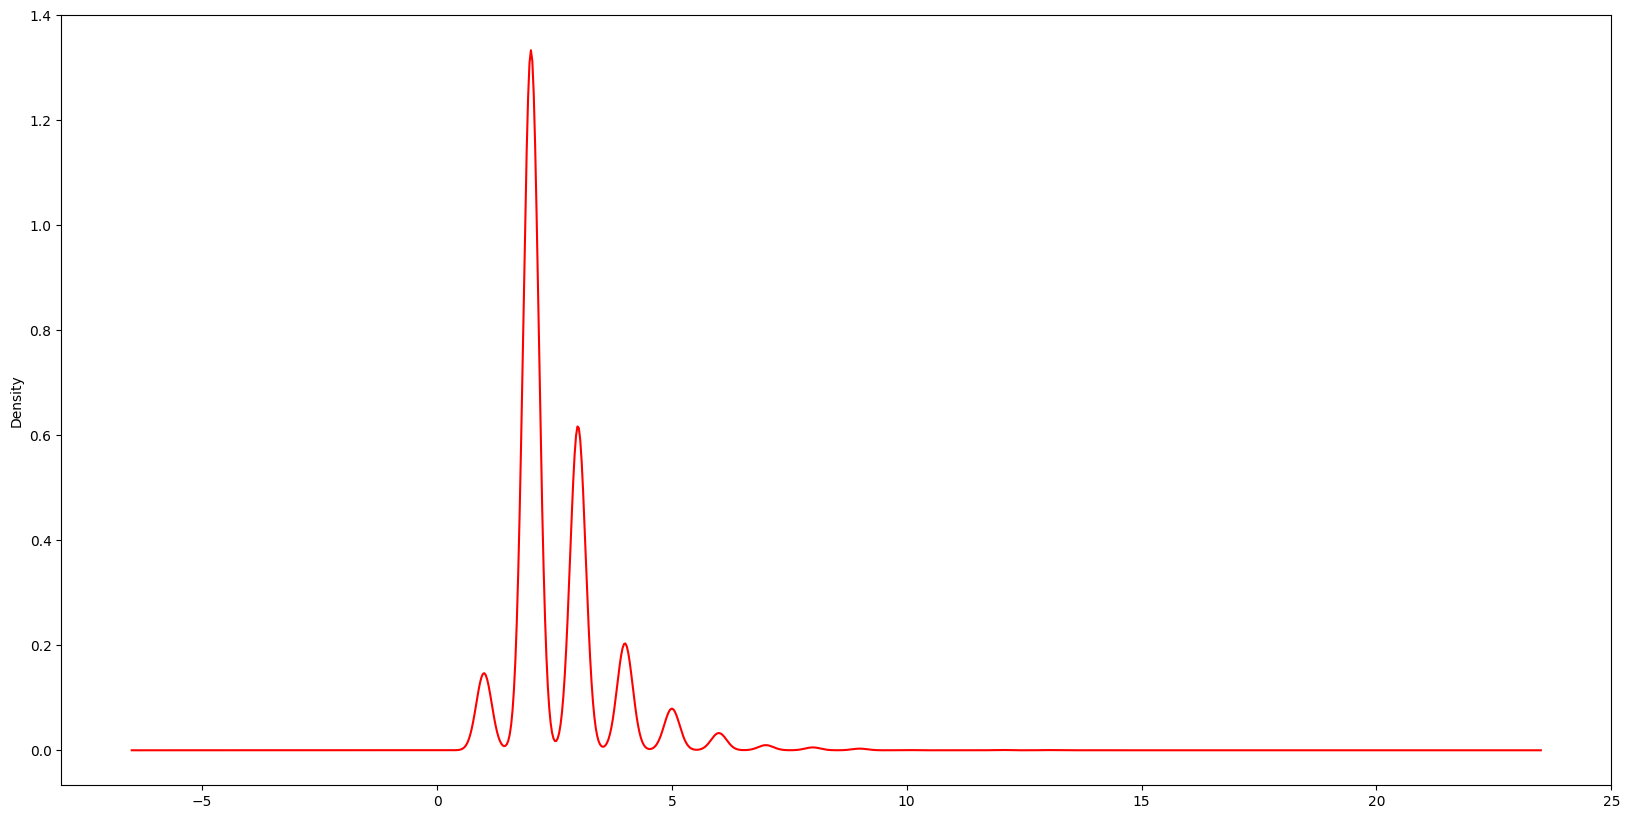

In [47]:
df6['bath'].plot(kind='kde',color='red')

# Training the model

In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score,GridSearchCV

In [49]:
df7 = df6.copy()
df7['price'] = np.log1p(df7['price'])

In [50]:
X = df7.drop(columns=['price'])
y = df7['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [51]:
class LogTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if isinstance(X, pd.Series):
            return np.log1p(X.values).reshape(-1, 1)  # Fix reshape issue
        return np.log1p(X) 

In [52]:
num_features = ['bath']
cat_features = ['size', 'location']

In [53]:
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_features),  # Scale numerical features
    ("log", LogTransformer(),'total_sqft'),
    ('cat', OneHotEncoder(handle_unknown='ignore',sparse=False), cat_features),  # One-hot encode categorical features
],remainder='passthrough')

In [54]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model',RandomForestRegressor(
        max_depth= 30,
        max_features= 'sqrt',
        min_samples_leaf= 1,
        min_samples_split= 10,
        n_estimators= 200,                      
    random_state=42   
))  
])

In [55]:

# 🔹 Step 7: Train Model
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['bath']),
                                                 ('log', LogTransformer(),
                                                  'total_sqft'),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['size', 'location'])])),
                ('model',
                 RandomForestRegressor(max_depth=30, max_features='sqrt',
                                       min_samples_split=10, n_estimators=200,
                                       random_state=42))])

In [56]:
y_pred = pipeline.predict(X_test)


In [57]:
mean_squared_error(y_test,y_pred)

0.10973165904578634

In [58]:
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2:.5f}')

R² Score: 0.78772


In [59]:
train_r2 = pipeline.score(X_train, y_train)
print(f"Train R² Score: {train_r2:.5f}")


Train R² Score: 0.82768


In [60]:
from sklearn.model_selection import cross_val_score

cv_r2 = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-Validation R² Scores: {cv_r2}")
print(f"Average R² Score: {cv_r2.mean():.5f}")


Cross-Validation R² Scores: [0.7383623  0.78913612 0.79018074 0.74342086 0.77114326]
Average R² Score: 0.76645


In [61]:
query_data = pd.DataFrame({
    'location': ['Double Road'],  # Example location
    'size': ['3 BHK'],           # Example size (can be categorical, e.g., '2 BHK')
    'total_sqft': [500],        # Example total square feet
    'bath': [3]                  # Example number of bathrooms
})


In [62]:
import pickle

# Save the entire pipeline to a file
with open('house_price_pipeline.pkl', 'wb') as file:
    pickle.dump(pipeline, file)
